# Modern Deep Learning: 
# Classify Fashion-MNIST with a simple CNN in Keras

<br> By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Why Jupyter Notebook?


*   Interactive programming in the web browser
*   Great for visualization
*   Great for collabration
*   Popular tool for studying machine learning / deep learning




## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



## Notebook Overview

<br> **Notebook location on github**: https://github.com/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb

This is a tutorial of how to classify **fashion_mnist** data with a simple **Convolutional Neural Network** in Keras. 
Keras is now part of the core TensorFlow library, in addition to being an independent open source project. 

The [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist) data: 
60,000 train and 10,000 test data with 10 categories. Each gray-scale image is 28x28.

<br> **Label**	**Description**
<br> 0 T-shirt/top
<br> 1 Trouser
<br> 2 Pullover
<br> 3 Dress
<br> 4 Coat
<br> 5 Sandal
<br> 6 Shirt
<br> 7 Sneaker
<br> 8 Bag
<br> 9 Ankle boot

Each gray-scale image is 28x28

>[Modern Deep Learning:](#scrollTo=r2NPAI4jZZgi)

>[Classify Fashion-MNIST with a simple CNN in Keras](#scrollTo=r2NPAI4jZZgi)

>>[Why Jupyter Notebook?](#scrollTo=18xLQCydFHqi)

>>[Why Fashion-MNIST?](#scrollTo=XLMRPLVCFwEc)

>>[Notebook Overview](#scrollTo=Ixyte299ZZgk)

>>[Download the fashion_mnist data](#scrollTo=LbCigZtNZZgl)

>>[Visualize the data](#scrollTo=tWORMSC8FDR4)

>>[Data normalization](#scrollTo=Zx-Ee6LHZZgt)

>>[Split the data into train/validation/test data sets](#scrollTo=CFlNHktHBtru)

>>[Create the model architecture](#scrollTo=HhalcO03ZZg3)

>>[Compile the model](#scrollTo=FhxJ5dinZZg8)

>>[Train the model](#scrollTo=DtOvh3YVZZg_)

>>[Load Model with the best validation accuracy](#scrollTo=e-MGLwZQy05d)

>>[Test Accuracy](#scrollTo=9RTRkan4yq5H)

>>[Visualize prediction](#scrollTo=oJv7XEk10bOv)

>>[Congragulations!](#scrollTo=8AehWdRAVKN5)



## Download the fashion_mnist data
First let's install TensorFlow version 1.8.0 and import Tensorflow. Then we download fashion-mnist which is one of the Keras datasets. 

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [2]:
# Further break training data into train / validation sets (# put 12000 into validation set and keep remaining 48,000 for train)
#Split the data into 80% training and 20% testing dataset.
seed = 123
x_train, x_valid,y_train, y_valid = train_test_split(x_train,y_train,test_size = 0.2,random_state=seed)


# Reshape input data to (28, 28)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0],w*h)
x_valid = x_valid.reshape(x_valid.shape[0],w*h)
x_test = x_test.reshape(x_test.shape[0], w*h)
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train,10)
y_valid = keras.utils.to_categorical(y_valid,10)
y_test = keras.utils.to_categorical(y_test,10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

(48000, 784) (48000,)
(12000, 784) (12000,)
(10000, 784) (10000,)
x_train shape: (48000, 784) y_train shape: (48000, 10)
48000 train set
12000 validation set
10000 test set


### ANN

In [3]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error

ann = Sequential()
##Hidden layer
ann.add(Dense(256,activation='relu',input_shape=(784,)))
ann.add(Dropout(0.2))
ann.add(Dense(256,activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(256,activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(256,activation='relu'))
ann.add(Dropout(0.2))
##Output layer
ann.add(Dense(10,activation = 'softmax'))
##Compile the network
ann.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
##Fit the model
history0 = ann.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 200us/sample - loss: 0.6251 - acc: 0.7775 - val_loss: 0.4420 - val_acc: 0.8467
Epoch 2/10
48000/48000 [==============================] - 9s 181us/sample - loss: 0.5268 - acc: 0.8235 - val_loss: 0.4330 - val_acc: 0.8539
Epoch 3/10
48000/48000 [==============================] - 9s 185us/sample - loss: 0.5515 - acc: 0.8253 - val_loss: 0.4469 - val_acc: 0.8660
Epoch 4/10
48000/48000 [==============================] - 9s 183us/sample - loss: 0.5745 - acc: 0.8287 - val_loss: 0.5265 - val_acc: 0.8211
Epoch 5/10
48000/48000 [==============================] - 9s 182us/sample - loss: 0.5971 - acc: 0.8265 - val_loss: 0.5028 - val_acc: 0.8615
Epoch 6/10
48000/48000 [==============================] - 9s 183us/sample - loss: 0.6213 - acc: 0.8290 - val_loss: 0.4919 - val_acc

### ANN loss

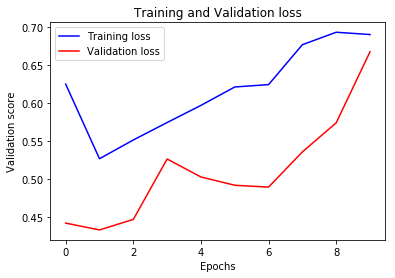

In [4]:
##Create the loss plot
plt.plot(history0.history['loss'],'b',label = 'Training loss')
plt.plot(history0.history['val_loss'],'r',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()
plt.show()

### ANN accuracy

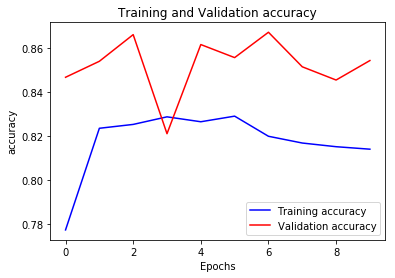

In [5]:
##Create the accuracy plot
plt.plot(history0.history['acc'],'b',label='Training accuracy')
plt.plot(history0.history['val_acc'],'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Test ANN accuracy

In [6]:
# Evaluate the model on test set
score = ann.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8435


### Retrain ANN

In [7]:
ann1 = Sequential()
##Hidden layer
ann1.add(Dense(256,activation='relu',input_shape=(784,)))
ann1.add(Dropout(0.2))
ann1.add(Dense(256,activation='relu'))
ann1.add(Dropout(0.2))
ann1.add(Dense(256,activation='relu'))
ann1.add(Dropout(0.2))
ann1.add(Dense(256,activation='relu'))
ann1.add(Dropout(0.2))
##Output layer
ann1.add(Dense(10,activation = 'softmax'))
##Compile the network
ann1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
##Fit the model
history0_1 = ann1.fit(x_train,y_train,epochs=9,validation_data=(x_valid,y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/9
48000/48000 [==============================] - 9s 190us/sample - loss: 0.6344 - acc: 0.7723 - val_loss: 0.4490 - val_acc: 0.8521
Epoch 2/9
48000/48000 [==============================] - 9s 186us/sample - loss: 0.5289 - acc: 0.8234 - val_loss: 0.4680 - val_acc: 0.8481
Epoch 3/9
48000/48000 [==============================] - 9s 186us/sample - loss: 0.5457 - acc: 0.8268 - val_loss: 0.4691 - val_acc: 0.8472
Epoch 4/9
48000/48000 [==============================] - 9s 188us/sample - loss: 0.5559 - acc: 0.8300 - val_loss: 0.4555 - val_acc: 0.8561
Epoch 5/9
48000/48000 [==============================] - 9s 184us/sample - loss: 0.5770 - acc: 0.8292 - val_loss: 0.4778 - val_acc: 0.8547
Epoch 6/9
48000/48000 [==============================] - 9s 185us/sample - loss: 0.5917 - acc: 0.8303 - val_loss: 0.4864 - val_acc: 0.8476
Epoch 7/9
48000/48000 [==============================] - 9s 186us/sample - loss: 0.6045 - acc: 0.8323 - val_loss: 0.

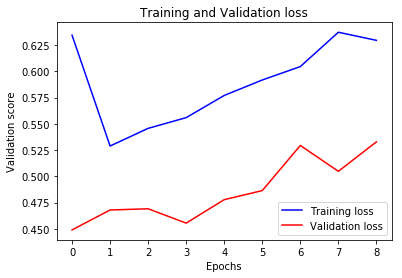

In [8]:
##Create loss plot
plt.plot(history0_1.history['loss'],'b',label = 'Training loss')
plt.plot(history0_1.history['val_loss'],'r',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()
plt.show()

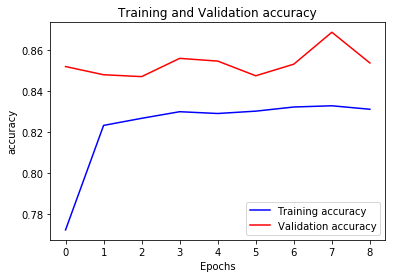

In [9]:
##Create accuracy plot
plt.plot(history0_1.history['acc'],'b',label='Training accuracy')
plt.plot(history0_1.history['val_acc'],'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluate the model on test set
score1 = ann1.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score1[1])


 Test accuracy: 0.8435


### Baseline CNN model

In [11]:
# Reshape input data to (28, 28)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h,1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h,1)
x_test = x_test.reshape(x_test.shape[0], w, h,1)

cnn = Sequential()
##Conv
cnn.add(Conv2D(32,(3,3),activation='relu',padding = 'same',input_shape=(28,28,1)))
cnn.add(MaxPool2D((2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu',padding = 'same'))
cnn.add(MaxPool2D((2,2)))
cnn.add(Conv2D(128,(3,3),activation='relu',padding = 'same'))
cnn.add(MaxPool2D(2,2))
cnn.add(Flatten())
##Hidden layer
cnn.add(Dense(256,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(256,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(256,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(256,activation='relu'))
cnn.add(Dropout(0.2))
##Output layer
cnn.add(Dense(10,activation = 'softmax'))
##Compile the network
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
##Fit the model
history = cnn.fit(x_train,y_train,epochs=10,batch_size=512,validation_data=(x_valid,y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 137us/sample - loss: 1.1031 - acc: 0.5657 - val_loss: 0.6231 - val_acc: 0.7679
Epoch 2/10
48000/48000 [==============================] - 4s 75us/sample - loss: 0.5592 - acc: 0.7896 - val_loss: 0.4307 - val_acc: 0.8375
Epoch 3/10
48000/48000 [==============================] - 4s 74us/sample - loss: 0.4270 - acc: 0.8435 - val_loss: 0.3563 - val_acc: 0.8734
Epoch 4/10
48000/48000 [==============================] - 4s 75us/sample - loss: 0.3515 - acc: 0.8721 - val_loss: 0.3248 - val_acc: 0.8838
Epoch 5/10
48000/48000 [==============================] - 4s 75us/sample - loss: 0.3088 - acc: 0.8860 - val_loss: 0.2876 - val_acc: 0.8956
Epoch 6/10
48000/48000 [==============================] - 4s 74us/sample - loss: 0.2773 - acc: 0.8984 - val_loss: 0.2952 - val_acc: 0.8898
Epoch 7/10
48000/48000 [==============================] - 4s 74us/sample - loss: 0.2542 - acc: 0.9067 - val_loss: 0

### CNN loss

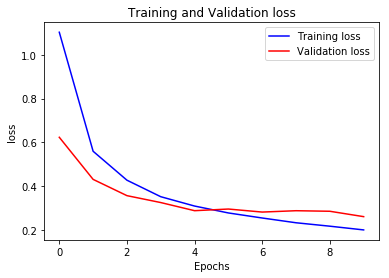

In [12]:
##Create the loss plot
plt.plot(history.history['loss'],'b',label='Training loss')
plt.plot(history.history['val_loss'],'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### CNN accuracy

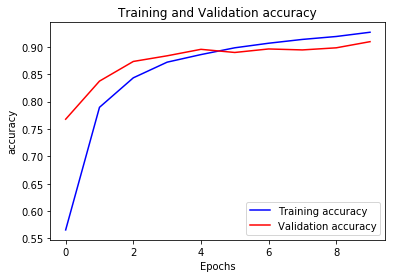

In [13]:
plt.plot(history.history['acc'],'b',label='Training accuracy')
plt.plot(history.history['val_acc'],'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [14]:
# Evaluate the model on test set
score2 = cnn.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score2[1])


 Test accuracy: 0.9057


### Then, do at least one of the data pre-processing techniques described in Brownlee.
### Perform feature standardization.
### Perform ZCA whitening of your images.
### Augment data with random rotations, shifts and ips of images.

In [15]:
# normalize the data
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

from keras.preprocessing.image import ImageDataGenerator
zca = ImageDataGenerator(zca_whitening=True,rotation_range=90,width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True, vertical_flip=True)
zca.fit(x_train)
zca.fit(x_valid)
zca.fit(x_test)

cnn2 = Sequential()
##Conv
cnn2.add(Conv2D(32,(3,3),activation='relu',padding = 'same',input_shape=(28,28,1)))
cnn2.add(MaxPool2D((2,2)))
cnn2.add(Conv2D(64,(3,3),activation='relu',padding = 'same'))
cnn2.add(MaxPool2D((2,2)))
cnn2.add(Conv2D(128,(3,3),activation='relu',padding = 'same'))
cnn2.add(MaxPool2D(2,2))
cnn2.add(Flatten())
##Hidden layer
cnn2.add(Dense(256,activation='relu'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(256,activation='relu'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(256,activation='relu'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(256,activation='relu'))
cnn2.add(Dropout(0.2))
##Output layer
cnn2.add(Dense(10,activation = 'softmax'))
##Compile the network
cnn2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
##Fit the model
history2 = cnn2.fit(x_train,y_train,epochs=10,batch_size=512,validation_data=(x_valid,y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 82us/sample - loss: 1.1808 - acc: 0.5442 - val_loss: 0.6207 - val_acc: 0.7645
Epoch 2/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.5755 - acc: 0.7862 - val_loss: 0.4889 - val_acc: 0.8134
Epoch 3/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.4257 - acc: 0.8446 - val_loss: 0.3607 - val_acc: 0.8648
Epoch 4/10
48000/48000 [==============================] - 4s 73us/sample - loss: 0.3590 - acc: 0.8708 - val_loss: 0.3847 - val_acc: 0.8568
Epoch 5/10
48000/48000 [==============================] - 3s 73us/sample - loss: 0.3149 - acc: 0.8846 - val_loss: 0.2903 - val_acc: 0.8953
Epoch 6/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.2888 - acc: 0.8939 - val_loss: 0.2906 - val_acc: 0.8968
Epoch 7/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.2585 - acc: 0.9065 - val_loss: 0.

### CNN2 loss

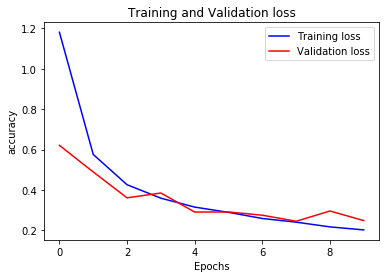

In [16]:
##Create the loss plot
plt.plot(history2.history['loss'],'b',label='Training loss')
plt.plot(history2.history['val_loss'],'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### CNN2 accuracy

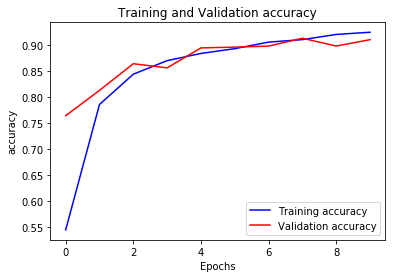

In [17]:
plt.plot(history2.history['acc'],'b',label='Training accuracy')
plt.plot(history2.history['val_acc'],'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Test accuracy

In [18]:
# Evaluate the model on test set
score4 = cnn2.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score4[1])


 Test accuracy: 0.9077


### Visualize the prediction

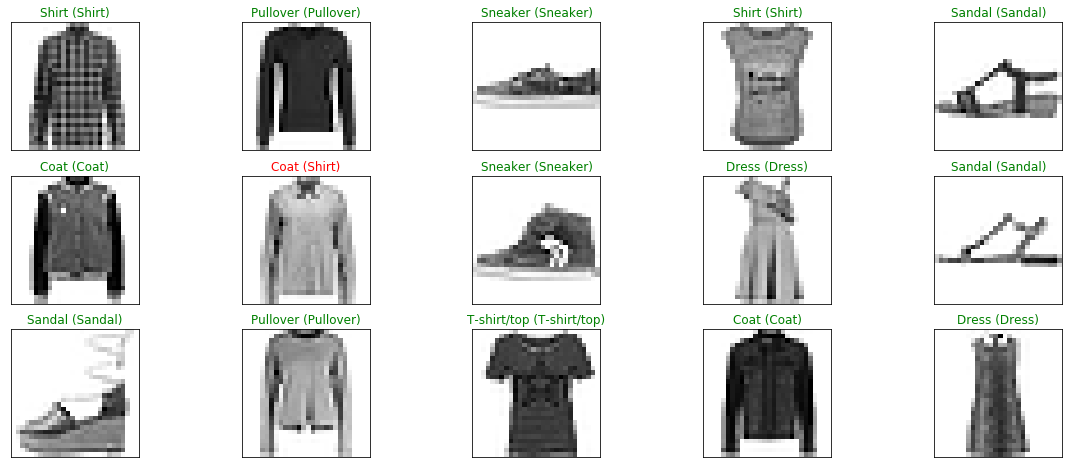

In [19]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9




y_hat = cnn2.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]),cmap = 'gray_r')
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

### Rerun ANN with new data

In [20]:
x_train = x_train.reshape(x_train.shape[0],w*h)
x_valid = x_valid.reshape(x_valid.shape[0],w*h)
x_test = x_test.reshape(x_test.shape[0], w*h)

ann2 = Sequential()
##Hidden layer
ann2.add(Dense(256,activation='relu',input_shape=(784,)))
ann2.add(Dropout(0.2))
ann2.add(Dense(256,activation='relu'))
ann2.add(Dropout(0.2))
ann2.add(Dense(256,activation='relu'))
ann2.add(Dropout(0.2))
ann2.add(Dense(256,activation='relu'))
ann2.add(Dropout(0.2))
##Output layer
ann2.add(Dense(10,activation = 'softmax'))
##Compile the network
ann2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
##Fit the model
history0_3 = ann2.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 187us/sample - loss: 0.6252 - acc: 0.7769 - val_loss: 0.4406 - val_acc: 0.8371
Epoch 2/10
48000/48000 [==============================] - 9s 195us/sample - loss: 0.5364 - acc: 0.8227 - val_loss: 0.4614 - val_acc: 0.8565
Epoch 3/10
48000/48000 [==============================] - 9s 189us/sample - loss: 0.5579 - acc: 0.8246 - val_loss: 0.5546 - val_acc: 0.8461
Epoch 4/10
48000/48000 [==============================] - 9s 186us/sample - loss: 0.5886 - acc: 0.8264 - val_loss: 0.4521 - val_acc: 0.8608
Epoch 5/10
48000/48000 [==============================] - 9s 188us/sample - loss: 0.6001 - acc: 0.8256 - val_loss: 0.5335 - val_acc: 0.8574
Epoch 6/10
48000/48000 [==============================] - 9s 183us/sample - loss: 0.6315 - acc: 0.8265 - val_loss: 0.5768 - val_acc: 0.8482
Epoch 7/10
48000/48000 [==============================] - 9s 189us/sample - loss: 0.6398 - acc: 0.8225 - val_l

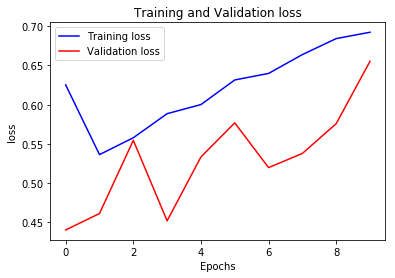

In [21]:
##Create the loss plot
plt.plot(history0_3.history['loss'],'b',label='Training loss')
plt.plot(history0_3.history['val_loss'],'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

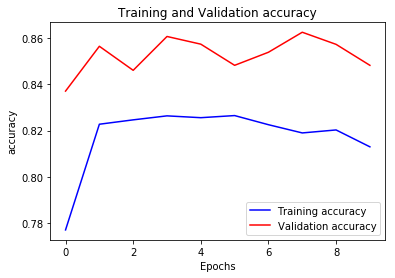

In [22]:
##Creat the accuracy plot
plt.plot(history0_3.history['acc'],'b',label='Training accuracy')
plt.plot(history0_3.history['val_acc'],'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Write-up

In [0]:
##Baseline NN model is not effective tool to make prediction and can not be visualied due to the dimension.
##Instead, CNN model without and with data normalization and ZCA whitening are better than baseline nn model.
##CNN model with data preprocessing only misses one picture.
##CNN model can reduce the amount and time of computation.